# Matplotlib Figure Tool

### Import libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import re

### Settings

In [2]:
select_setting = 3
COLOR_ALPHA = 0.1
CURVE_WIDTH = 1.5
MARKER_SIZE = 8
matplotlib.rc('font', family='Times New Roman') 
# matplotlib.rc('font', serif='Helvetica Neue') 
# matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 16})

### Functions

In [3]:
def read_file(filename_full):
    file_content = []
    with open(filename_full) as file:
        for line in file:
            file_content.append([i for i in re.sub(',', ' ', line).split()])
    return file_content

def plot_curve(title, x, y, curve_name, color, marker, line_width=CURVE_WIDTH):
    if title in figure_handle_list.keys():
        [fig, subplot] = figure_handle_list[title]
    else:
        fig = plt.figure(figsize=(6, 4), dpi=100)
        subplot = fig.add_subplot(1, 1, 1)
        figure_handle_list[title] = [fig, subplot]
    c = [_ / 255 for _ in color]
    curve = subplot.plot(x, y, color=c,
            linewidth=line_width, marker=marker,
            markevery=int(x.shape[-1]/10), markersize=MARKER_SIZE,
            label=curve_name, # '_nolegend_',
        )

def plot_legend(title, position):
    if title in figure_handle_list.keys():
        [fig, subplot] = figure_handle_list[title]
        # center upper lower left right
        subplot.legend(loc=position, fontsize=16, labelspacing=0.3)
    else:
        print('Error title name')

def plot_axis_label(title, x_label, y_label):
    if title in figure_handle_list.keys():
        [fig, subplot] = figure_handle_list[title]
        subplot.set_xlabel(x_label, fontsize=20)
        subplot.set_ylabel(y_label, fontsize=20)
        plt.setp(subplot.get_xticklabels(), fontsize=20)
        plt.setp(subplot.get_yticklabels(), fontsize=20)
    else:
        print('Error title name')

def plot_title(title, title_for_display):
    if title in figure_handle_list.keys():
        [fig, subplot] = figure_handle_list[title]
        fig.suptitle(title_for_display, fontsize=26)
    else:
        print('Error title name')
        
def plot_decoration(title, sci_x=False, sci_y=False, grid=True):
    if title in figure_handle_list.keys():
        [fig, subplot] = figure_handle_list[title]
        if sci_x == True:
            subplot.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
        if sci_y == True:
            subplot.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)
        if grid == True:
            subplot.grid(True, which='major', axis='both', linewidth=0.5, color=[212/255, 212/255, 212/255])
    else:
        print('Error title name')

def plot_save(title, file_name, file_type):
    if title in figure_handle_list.keys():
        [fig, subplot] = figure_handle_list[title]
        filename_full = file_name + file_type
        fig.savefig(filename_full, bbox_inches='tight', pad_inches=0)
    else:
        print('Error title name')

### Prepare Data

In [4]:
if select_setting == 1:
    figure_handle_list = {}
    folder = '/home/yangzhile/Work/visual_search/log_text'
    filename = 'log_h_adam_1.0000_0.001000_rep93.txt'
    file_content = read_file(os.path.join(folder, filename))
    train_step, agent_loss, discriminator_loss = [], [], []
    for str_list in file_content:
        if str_list[0] == 'train' and int(str_list[1]) < 4500:
            train_step.append(int(str_list[1]))
            agent_loss.append(float(str_list[3]))
            discriminator_loss.append(float(str_list[4]) * 40)
    plot_curve('Loss', np.array(train_step), np.array(agent_loss), 'agent loss', [214, 39, 40], 's', 1)
    plot_curve('Loss', np.array(train_step), np.array(discriminator_loss), 'discriminator loss * 40', [44, 160, 44], 'd', 1)
    plot_legend('Loss', 'best')
    plot_axis_label('Loss', x_label='Train Step Num', y_label='Losses')
    plot_decoration('Loss', sci_x=False, sci_y=False, grid=True)
#     plot_title('Loss', 'Losses')
    
    output_filename = '/home/yangzhile/Work/visual_search/draw/20221118_loss_3'
    plot_save('Loss', output_filename, '.svg')

In [5]:
if select_setting == 2:
    figure_handle_list = {}
    folder = '/home/yangzhile/Work/visual_search/log_text'
    filename = 'log_h_adam_0.9700_0.000100_rep81.txt'
    file_content = read_file(os.path.join(folder, filename))
    train_step, agent_loss, discriminator_loss = [], [], []
    for str_list in file_content:
        if str_list[0] == 'train' and int(str_list[1]) < 6000:
            train_step.append(int(str_list[1]))
            agent_loss.append(float(str_list[3]))
            discriminator_loss.append(float(str_list[4]) * 40)
    plot_curve('Loss', np.array(train_step), np.array(agent_loss), 'agent loss', [214, 39, 40], 's', 1)
    plot_curve('Loss', np.array(train_step), np.array(discriminator_loss), 'discriminator loss * 40', [44, 160, 44], 'd', 1)
    plot_legend('Loss', 'best')
    plot_axis_label('Loss', x_label='Train Step Num', y_label='Losses')
    plot_decoration('Loss', sci_x=False, sci_y=False, grid=True)
#     plot_title('Loss', 'Losses')
    
    output_filename = '/home/yangzhile/Work/visual_search/draw/20221122_loss_1'
    plot_save('Loss', output_filename, '.svg')

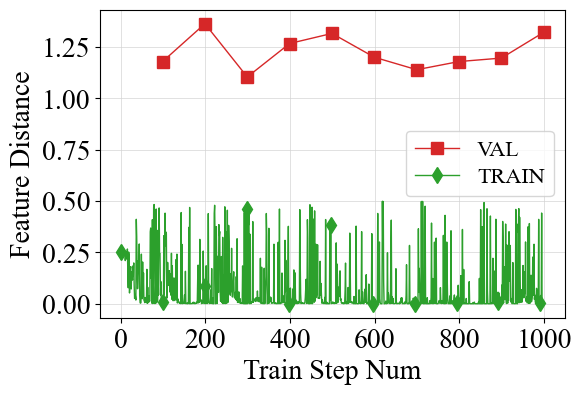

In [12]:
if select_setting == 3:
    figure_handle_list = {}
    folder = '/home/yangzhile/Work/visual_search/log_text'
    filename = 'log_h_adam_0.9700_0.000100_rep71.txt'
    file_content = read_file(os.path.join(folder, filename))
    
    train_step, val_perf = [], []
    for str_list in file_content:
        if str_list[0] == 'val' and int(str_list[1]) < 1000:
            train_step.append(int(str_list[1]))
            val_perf.append(float(str_list[2]))
    plot_curve('Loss', np.array(train_step), np.array(val_perf), 'VAL', [214, 39, 40], 's', 1)
    
    train_step, train_perf = [], []
    for str_list in file_content:
        if str_list[0] == 'train' and int(str_list[1]) < 1000:
            train_step.append(int(str_list[1]))
            train_perf.append(float(str_list[4]))
    plot_curve('Loss', np.array(train_step), np.array(train_perf), 'TRAIN', [44, 160, 44], 'd', 1)
    
    plot_legend('Loss', 'best')
    plot_axis_label('Loss', x_label='Train Step Num', y_label='Feature Distance')
    plot_decoration('Loss', sci_x=False, sci_y=False, grid=True)
#     plot_title('Loss', 'Feature Distance')
    
    output_filename = '/home/yangzhile/Work/visual_search/draw/20221123_loss_1'
    plot_save('Loss', output_filename, '.svg')
